In [1]:
import pickle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile import matrixProfile, motifs
import random
import seaborn as sns

In [3]:
with open ("network_lig_sio2.pkl", "rb") as model:
    network = pickle.load(model)

In [4]:
network

In [5]:
D3011_data = np.load('dataset_TipLig_SiO2.npz')
force_data = D3011_data['vDeflection_N'] * 10**9
random.seed(1025)
random.shuffle(force_data)
train_data = force_data[:100]

In [6]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

800 100


In [7]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

80000

In [8]:
mp = matrixProfile.stomp(joined_data, size)

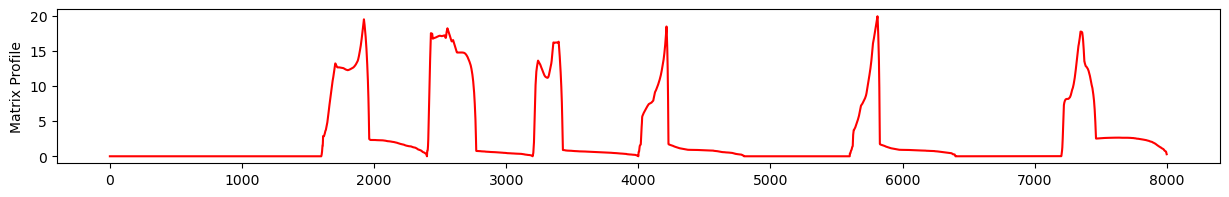

In [9]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [10]:
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000)

In [11]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [31]:
def recupera_ts(joined_ts_data, unit, network, mtfs, size, force_data):
    
    id_motifs = network.capture_objects #indices dos motifs em cada unidade
    curvas = []
    motifs = []
    p_mins = []
    
    for i in id_motifs[unit]: #pega o cluster de interesse
        motif = mtfs[i][0] #recupera o indice dos motifs do cluster de interesse
        motifs.append(motif)
    for motif in motifs: #analise o ponto de mínimo de cada motif
        p_min = min(joined_ts_data[motif:motif+size])
        p_mins.append(p_min)
        p_min_index = list(joined_ts_data[motif:motif+size]).index(p_min)
            
       
        idx_curva = motif // size 
        curvas.append(force_data[idx_curva])
                
    return curvas, p_mins

### Cluster 5

In [32]:
curvas_5, p_mins_5 = recupera_ts(joined_data, 5, network, mtfs, size, force_data)

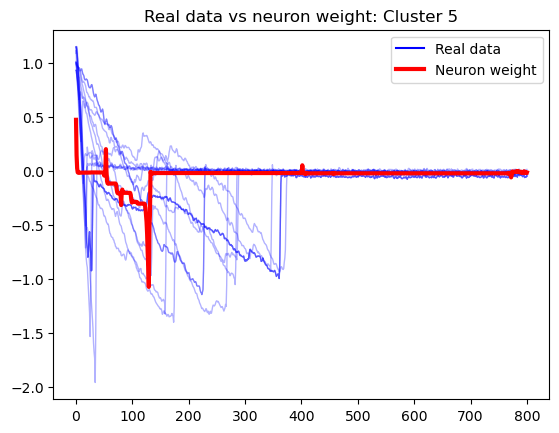

In [33]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias5 = curvas_5

y_principal5 = network.weights[5]

for y5 in ys_secundarias5:
    y5 = np.reshape(y5, (800,))
    plt.plot(list(x), list(y5), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal5, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 5")

# Exibir o gráfico
plt.show()

In [37]:
p_mins_5 = list(map(lambda x: -x, p_mins_5))

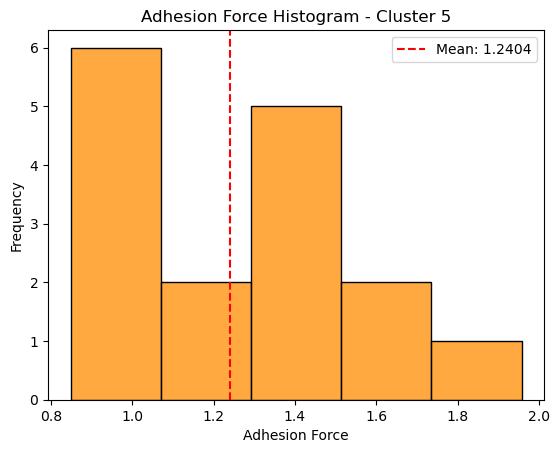

In [53]:
eixo = sns.histplot(p_mins_5, stat="count", color='darkorange')

mean_5 = np.mean(p_mins_5)

plt.axvline(mean_5, color='r', linestyle='dashed', label=f'Mean: {round(mean_5, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 5")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()

### Cluster 6

In [55]:
curvas_6, p_mins_6 = recupera_ts(joined_data, 6, network, mtfs, size, force_data)

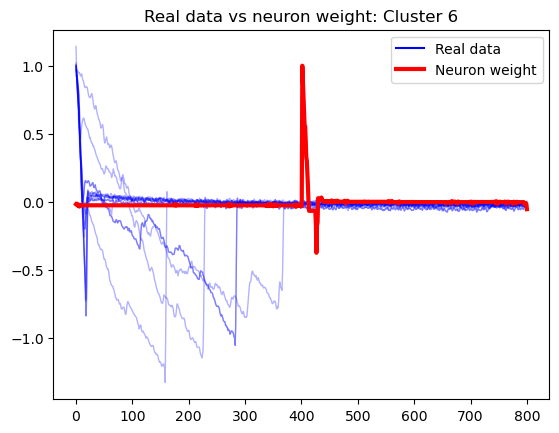

In [58]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias6 = curvas_6

y_principal6 = network.weights[6]

for y6 in ys_secundarias6:
    y6 = np.reshape(y6, (800,))
    plt.plot(list(x), list(y6), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal6, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 6")

# Exibir o gráfico
plt.show()

In [59]:
p_mins_6 = list(map(lambda x: -x, p_mins_6))

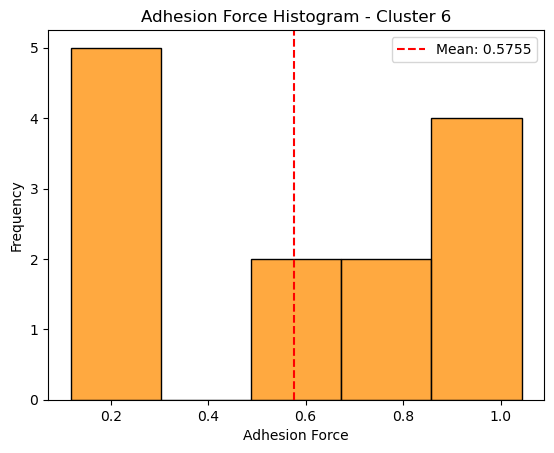

In [61]:
eixo = sns.histplot(p_mins_6, stat="count", color='darkorange')

mean_6 = np.mean(p_mins_6)

plt.axvline(mean_6, color='r', linestyle='dashed', label=f'Mean: {round(mean_6, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 6")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()

### Cluster 0

In [39]:
curvas_0, p_mins_0 = recupera_ts(joined_data, 0, network, mtfs, size, force_data)

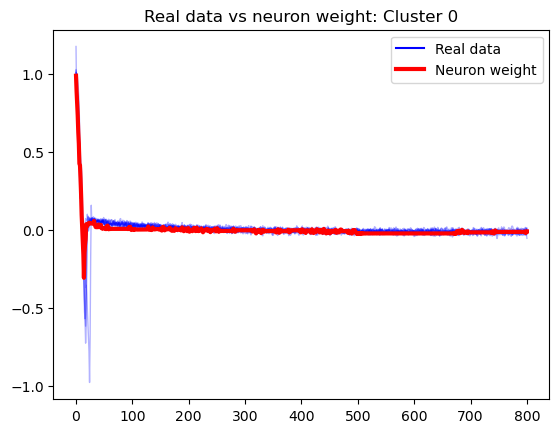

In [40]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias0 = curvas_0

y_principal0 = network.weights[0]

for y0 in ys_secundarias0:
    y0 = np.reshape(y0, (800,))
    plt.plot(list(x), list(y0), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal0, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 0")

# Exibir o gráfico
plt.show()

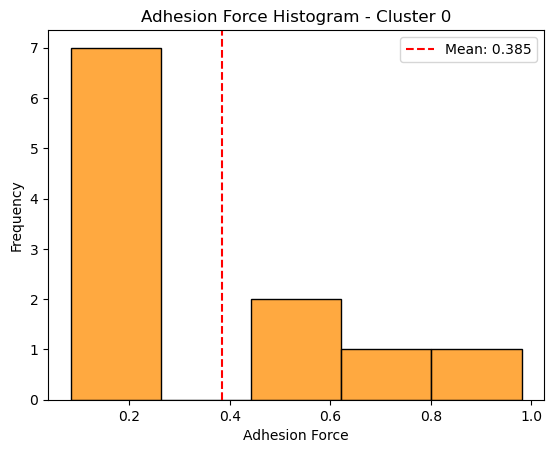

In [52]:
eixo = sns.histplot(p_mins_0, stat="count", color='darkorange')

mean_0 = np.mean(p_mins_0)

plt.axvline(mean_0, color='r', linestyle='dashed', label=f'Mean: {round(mean_0, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 0")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()

### Cluster 2

In [46]:
curvas_2, p_mins_2 = recupera_ts(joined_data, 2, network, mtfs, size, force_data)

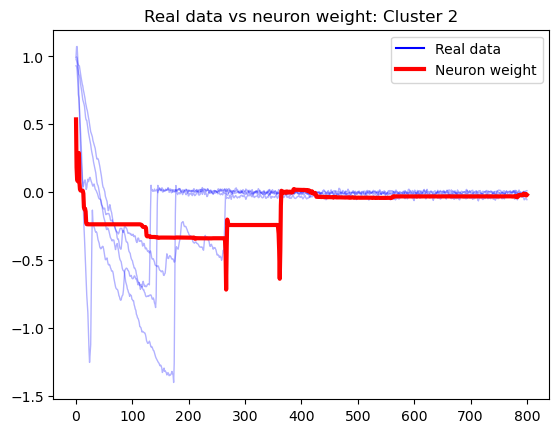

In [47]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias2 = curvas_2

y_principal1 = network.weights[2]

for y2 in ys_secundarias2:
    y2 = np.reshape(y2, (800,))
    plt.plot(list(x), list(y2), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal1, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 2")

# Exibir o gráfico
plt.show()

In [48]:
p_mins_2 = list(map(lambda x: -x, p_mins_2))

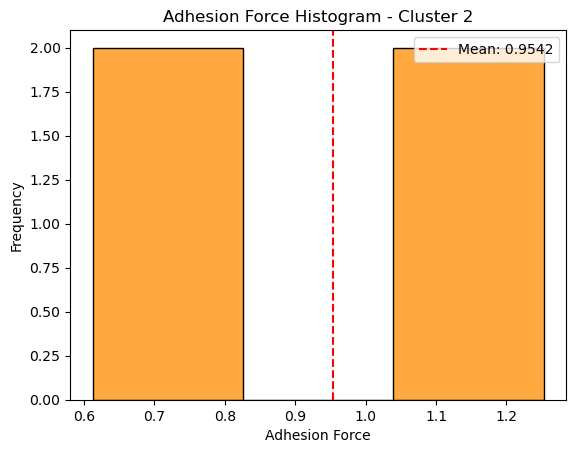

In [51]:
eixo = sns.histplot(p_mins_2, stat="count", color='darkorange')

mean_2 = np.mean(p_mins_2)

plt.axvline(mean_2, color='r', linestyle='dashed', label=f'Mean: {round(mean_2, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 2")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()